In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
import math
import sklearn.metrics as skm

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

In [400]:
data = pd.read_csv('data.csv')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [401]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

<AxesSubplot:>

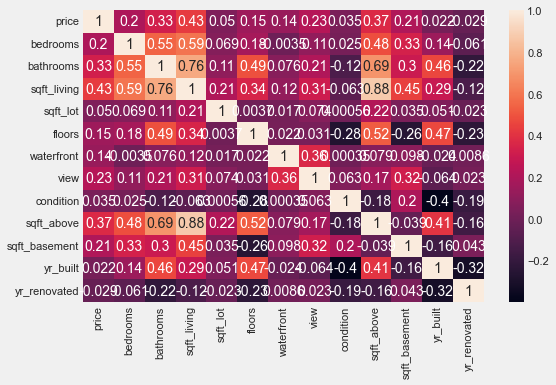

In [402]:
from matplotlib.pyplot import figure
figure(figsize=(8, 5))

# Creating a correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

In [403]:
data['renovated'] = [1 if i != 0 else 0 for i in data['yr_renovated']]
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1


In [404]:
data.drop(['street','city','statezip','country','yr_renovated','date'], axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,1
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,1
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


Outliers of price are removed.

Outliers of sqft_living are removed.

Outliers of yr_built are removed.



((array([-3.59272476, -3.35476892, -3.22348351, ...,  3.22348351,
          3.35476892,  3.59272476]),
  array([0, 0, 0, ..., 1, 1, 1], dtype=int64)),
 (0.38915495716564996, 0.4098205854579792, 0.7906739540084181))

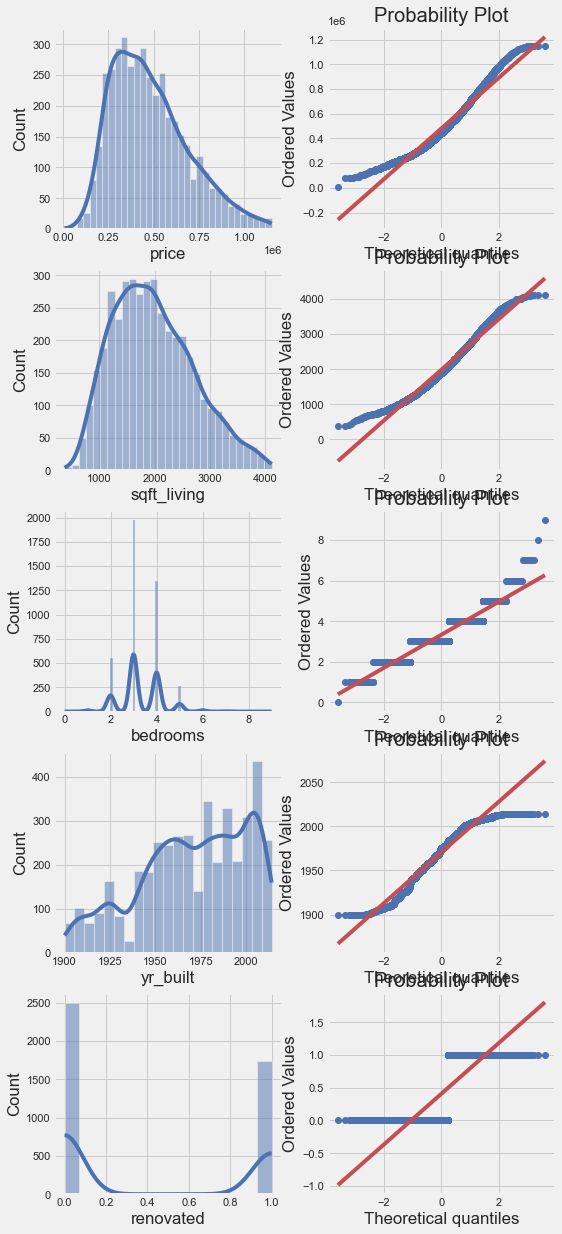

In [405]:
new_data=remove_outliers(data, 'price')
new_data=remove_outliers(new_data, 'sqft_living')
new_data=remove_outliers(new_data, 'yr_built')
fig = plt.figure(figsize=(8, 20))
grid = GridSpec(ncols=2, nrows=5, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0,0])
sns.histplot(new_data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[0, 1])
stats.probplot(new_data['price'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[1, 0])
sns.histplot(new_data['sqft_living'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1,1])
stats.probplot(new_data['sqft_living'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[2, 0])
sns.histplot(new_data['bedrooms'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[2, 1])
stats.probplot(new_data['bedrooms'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[3, 0])
sns.histplot(new_data['yr_built'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[3,1])
stats.probplot(new_data['yr_built'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[4, 0])
sns.histplot(new_data['renovated'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[4, 1])
stats.probplot(new_data['renovated'], plot=ax2)


In [406]:
new_data.describe().T


,count,mean,std,min,25%,50%,75%,max
price,4236.0,481106.111688,210180.033982,7800.0,317000.00,445000.00,605000.00,1150000.00
bedrooms,4236.0,3.333569,0.871382,0.0,3.00,3.00,4.00,9.00
bathrooms,4236.0,2.070408,0.692183,0.0,1.75,2.25,2.50,5.75
sqft_living,4236.0,1984.287063,733.117435,370.0,1420.00,1900.00,2470.00,4120.00
sqft_lot,4236.0,13885.101983,34799.758648,638.0,5000.00,7500.00,10437.75,1074218.00
floors,4236.0,1.487842,0.536424,1.0,1.00,1.50,2.00,3.50
waterfront,4236.0,0.003541,0.059409,0.0,0.00,0.00,0.00,1.00
view,4236.0,0.164306,0.627140,0.0,0.00,0.00,0.00,4.00
condition,4236.0,3.446648,0.671030,1.0,3.00,3.00,4.00,5.00
sqft_above,4236.0,1709.234891,705.296987,370.0,1170.00,1520.00,2140.00,4120.00


In [407]:
import random
data_1 = new_data.sample(100)
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100.0,493119.076474,216193.634270,150000.00,344000.0,456500.0,626250.00,1100000.00
bedrooms,100.0,3.210000,0.769297,2.00,3.0,3.0,4.00,5.00
bathrooms,100.0,2.037500,0.716310,0.75,1.5,2.0,2.50,4.25
sqft_living,100.0,1941.290000,765.149319,490.00,1347.5,1915.0,2472.50,4120.00
sqft_lot,100.0,9807.570000,10308.472744,1032.00,5000.0,6429.5,9799.25,60392.00
floors,100.0,1.455000,0.477234,1.00,1.0,1.5,2.00,2.50
waterfront,100.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.00
view,100.0,0.150000,0.641573,0.00,0.0,0.0,0.00,4.00
condition,100.0,3.500000,0.689019,3.00,3.0,3.0,4.00,5.00
sqft_above,100.0,1659.190000,774.567559,490.00,1097.5,1425.0,2210.00,3990.00


In [408]:
import numpy as np
from scipy import stats
mean = round(data_1['bedrooms'].mean())

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_1['bedrooms'] > mean) / len(data_1['bedrooms'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_1['bedrooms'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_1['bedrooms'])-1, loc=mean, scale=stats.sem(data_1['bedrooms']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Mean: 3.00
Greater than mean: 0.38
Test:  t = 40.43, p = 2.3724463807723731e-63
99% CI for the mean: (2.80, 3.20)
Reject the null hypothesis.


In [409]:
from scipy.stats import ttest_ind

# performing t-tests for continuous variables
f_stat, p_value = stats.f_oneway(data_1['price'], data_1['sqft_living'],data_1['bedrooms'],data_1['renovated'],data_1['yr_built'])
print("Test:  t = {:.2f}, p = {}".format(f_stat, p_value))

Test:  t = 518.20, p = 2.245168682192592e-175


In [410]:
data_2 = new_data.sample(200)

mean = round(data_2['bedrooms'].mean())

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_2['bedrooms'] > mean) / len(data_2['bedrooms'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_2['bedrooms'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_2['bedrooms'])-1, loc=mean, scale=stats.sem(data_2['bedrooms']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Mean: 3.00
Greater than mean: 0.385
Test:  t = 48.98, p = 5.664116690351787e-113
99% CI for the mean: (2.83, 3.17)
Reject the null hypothesis.


Correlation coefficient: 0.3091718376474925
Hypothesis test: p = 8.40615262384156e-06
99% CI for the correlation: (0.31, 0.0)
Reject the null hypothesis.


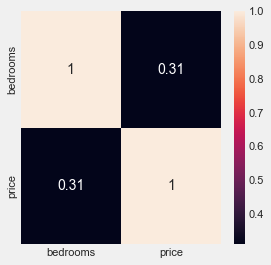

In [411]:
# Calculate the Pearson correlation coefficient
corr, p = stats.pearsonr(data_2['bedrooms'], data_2['price'])

# Calculate a 99% confidence interval for the correlation
ci = np.around(stats.pearsonr(data_2['bedrooms'], data_2['price']), decimals=2)

# Print the results
print("Correlation coefficient: {}".format(corr))
print("Hypothesis test: p = {}".format(p))
print("99% CI for the correlation: ({}, {})".format(ci[0], ci[1]))


df=data_2[['bedrooms','price']]
sns.heatmap(df.corr(),annot=True)
sns.set(rc={'figure.figsize':(4,4)})

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

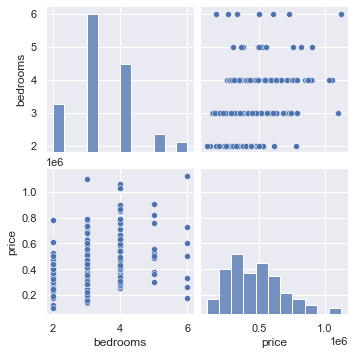

In [412]:
sns.pairplot(df)

In [413]:
x=df.iloc[:, 0].values
y=df.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     17.10
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.74e-05
Time:                        22:40:30   Log-Likelihood:                -2170.0
No. Observations:                 160   AIC:                             4344.
Df Residuals:                     158   BIC:                             4350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.558e+05   5.51e+04      4.644      0.000    1.47e+05    3.65e+05
x1          6.472e+04   1.56e+04      4.135      0.000    3.38e+04    9.56e+04
==============================================================================
Omnibus:                        3.867   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.828
Skew:                           0.337   Prob(JB):                        0.147
Kurtosis:                       2.654   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

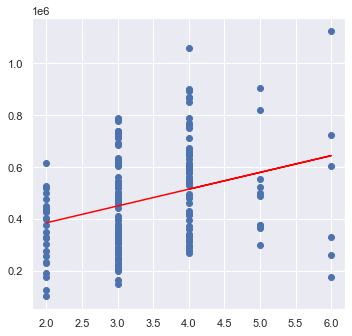

In [414]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.show()

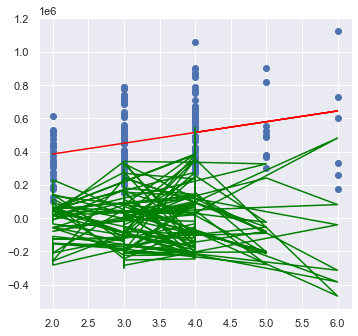

R2 score is:  0.08564541557728633


In [415]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.plot(x_train, ler.resid, color='green')
plt.show()

x_test_st = st.add_constant(x_test)
y_test_pred= ler.predict(x_test_st)
r2 = skm.r2_score(y_test, y_test_pred)
print('R2 score is: ',r2)

In [416]:
df1=new_data[['sqft_living', 'renovated', 'bedrooms','yr_built','price']]
x = df1[['sqft_living', 'renovated', 'bedrooms','yr_built']]
y = df1['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     615.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:40:31   Log-Likelihood:                -45409.
No. Observations:                3388   AIC:                         9.083e+04
Df Residuals:                    3383   BIC:                         9.086e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.016e+06   2.01e+05     14.974      0.000    2.62e+06    3.41e+06
sqft_living   220.5289      4.969     44.380      0.000     210.786     230.272
renovated   -1.861e+04   5885.416     -3.162      0.002   -3.01e+04   -7068.744
bedrooms    -3.544e+04   3988.794     -8.886      0.000   -4.33e+04   -2.76e+04
yr_built    -1443.8594    102.705    -14.058      0.000   -1645.230   -1242.489
==============================================================================
Omnibus:                      107.130   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.617
Skew:                           0.391   Prob(JB):                     3.20e-28
Kurtosis:                       3.535   Cond. No.                     2.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [417]:
print(ler.rsquared_adj)

0.4205257635079638


For multi regression equation.
<h5>The multi regression equation is : Y = 3.016e+06 + 220.5289 * (sqft_living) + -1.861e+04 * (renovated) + -3.544e+04 * (bedrooms) + -1443.8594 * (yr_built)</h5>

<h4>Y = 3.521e+06 +bedrooms * -3.645e+04 + 3.493e+04 * bathrooms + 123.7904 * sqft_living + 
sqft_lot * -0.2185	+ floors * 5.831e+04 + waterfront * 1.189e+05 + view * 3.238e+04 + condition * 2.37e+04 + sqft_above * 67.9539	+ sqft_basement * 	55.8364 + yr_built * -1795.9478	+ renovated	 * 1548.2712</h4>

In [418]:
print(ler.rsquared_adj)

0.4205257635079638


In [419]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
data = data.query('price > 0')
data = data.drop(['date', 'statezip', 'street', 'country'], axis=1)
features = data.drop('price', axis=1)
target = data.price.values
target_logged = np.log(target)
nums = features.select_dtypes('number')
text = features.select_dtypes('object')
binary_columns = nums.iloc[:, [0,1,4,5,6,7,-2, -1]].reset_index(drop=True)

cols = data.columns.to_list()
c_wanted = []

for c in cols:
    if c.startswith('s'):
        c_wanted.append(c)
        
poly_features = data[c_wanted]

scores = []

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(poly_features)
polyies = pd.DataFrame(poly_features, columns = poly.get_feature_names_out())

scaler = RobustScaler()
nums = scaler.fit_transform(polyies)

nums_scaled = pd.DataFrame(nums, columns = scaler.get_feature_names_out())
ohe_city = pd.get_dummies(text).reset_index(drop=True)
full_data = pd.concat([nums_scaled, ohe_city, binary_columns], axis=1)

X_train, X_test, y_train, y_test = train_test_split(full_data, target_logged, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
mean_absolute_error=  metrics.mean_absolute_error(model.predict(X_test), y_test)
print(mean_absolute_error)
print('-'*100)
measures = pd.DataFrame(np.column_stack((model.predict(X_test), y_test)), columns=['prediction', 'actual'])
measures['error'] = measures.iloc[:,0] - measures.iloc[:,1]
measures.head(10)

0.1919714880993372
----------------------------------------------------------------------------------------------------


,prediction,actual,error
0,14.145229,14.018451,0.126778
1,13.125200,13.115846,0.009354
2,13.263468,13.325304,-0.061837
3,12.407521,12.487485,-0.079964
4,13.307693,13.329378,-0.021685
5,13.011890,12.976181,0.035709
6,12.855746,12.628067,0.227679
7,12.683898,12.911642,-0.227744
8,13.021047,12.762827,0.258220
9,13.600789,13.639966,-0.039177


not a good fit